**THIS NOTEBOOK CONTAINS FORECAST OF TRANSACTION AMOUNT FOR SELLER 16 FROM INVOICE DATA WITH TRAIN TEST APPROACH TO FIND THE BEST MODEL BY COMPARING AIC VALUES.**

In [1]:
#Importing the prerequisite libraries that are to be used further.
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib.pyplot as plt

**Below is the importing of data file. It also includes changing the format of date time and extracting the date from it.**

In [2]:
invoice=pd.read_csv("inv_transdt_transamt_selrid.csv")

**No null values are there in the code.**

In [3]:
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86319 entries, 0 to 86318
Data columns (total 3 columns):
TransactionDate    86319 non-null object
SellerId           86319 non-null int64
Trans_amount       86319 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.0+ MB


**Formating the datetime format.**

In [4]:
invoice["TransactionDate"]=pd.to_datetime(pd.to_datetime(invoice["TransactionDate"]).dt.date)

In [5]:
invoice.head()

,TransactionDate,SellerId,Trans_amount
0,2019-03-15,19,10000
1,2017-04-18,19,5000000
2,2019-07-18,1,5000
3,2019-07-18,1,13000
4,2019-07-18,1,17500


In [6]:
seller_count=invoice.groupby("SellerId").count()

In [7]:
seller_count

,TransactionDate,Trans_amount
SellerId,,
1,8,8
2,631,631
3,97,97
5,1790,1790
6,32,32
9,2898,2898
10,20803,20803
11,4118,4118
12,7946,7946


**FORECAST FOR SELLER_16**

**Following is the time series preparation for seller 16 by extracting transaction date and Transaction amount.**

In [11]:
sel=invoice[invoice.SellerId==16][["TransactionDate","Trans_amount"]]
sel=sel.set_index("TransactionDate")
sel = sel.groupby(pd.Grouper(freq="W")).sum()
ts=sel["Trans_amount"]

In [12]:
len(ts)

183

**Sample of the series.**

In [13]:
ts.tail(10)

TransactionDate
2019-05-26    1994721
2019-06-02    2563215
2019-06-09    3089540
2019-06-16    2944471
2019-06-23    2457244
2019-06-30    2536102
2019-07-07    3660250
2019-07-14    4015262
2019-07-21    1218675
2019-07-28    1223000
Freq: W-SUN, Name: Trans_amount, dtype: int64

In [14]:
ts.tail()

TransactionDate
2019-06-30    2536102
2019-07-07    3660250
2019-07-14    4015262
2019-07-21    1218675
2019-07-28    1223000
Freq: W-SUN, Name: Trans_amount, dtype: int64

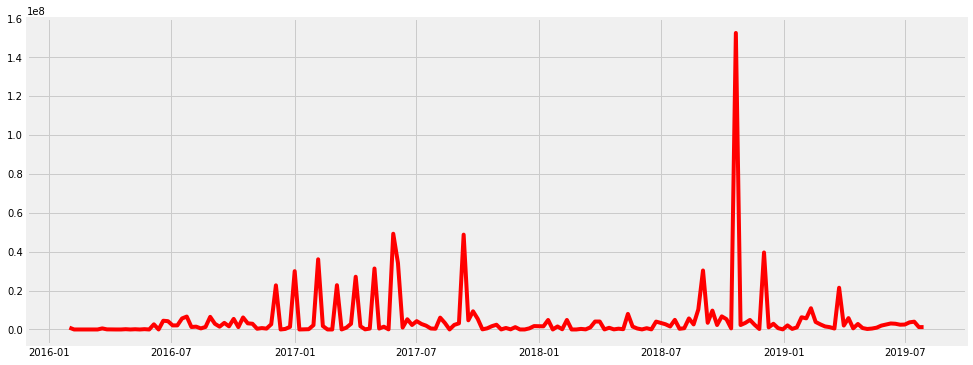

In [15]:
plt.figure(figsize=(15,6))
plt.plot(ts, color="red")

**This is dickey fuller test.**

In [16]:
from statsmodels.tsa.stattools import adfuller
def dft(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test_stats','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return(dfoutput)

In [17]:
dft(ts)

Test_stats                    -1.340517e+01
p-value                        4.485337e-25
#Lags Used                     0.000000e+00
Number of Observations Used    1.820000e+02
Critical Value (1%)           -3.466800e+00
Critical Value (5%)           -2.877555e+00
Critical Value (10%)          -2.575308e+00
dtype: float64

**This is the sample 10 datapoints.**

In [18]:
ts.head(10)

TransactionDate
2016-01-31    932391
2016-02-07         0
2016-02-14         0
2016-02-21         0
2016-02-28         0
2016-03-06         0
2016-03-13         0
2016-03-20    545887
2016-03-27     54266
2016-04-03         0
Freq: W-SUN, Name: Trans_amount, dtype: int64

**Below is the test for stationarity of the time series.**

In [19]:
from statsmodels.tsa.stattools import adfuller
def dft(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test_stats','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return(dfoutput)

**Testing the stationariy for the series by using Dickey Fuller test.**

In [20]:
dft(ts)

Test_stats                    -1.340517e+01
p-value                        4.485337e-25
#Lags Used                     0.000000e+00
Number of Observations Used    1.820000e+02
Critical Value (1%)           -3.466800e+00
Critical Value (5%)           -2.877555e+00
Critical Value (10%)          -2.575308e+00
dtype: float64

**Clearly the Test_stats is already lesser than the minimum critical values. So with 99% confidence it can be inferred that the series is stationary.**

**Below is the preparation of input parameters for the ARIMA model to be applied on the series.**

In [21]:
from statsmodels.tsa.stattools import acf, pacf
# Requisite libraries for computing auto correlation function and partial auto correlation function. 

In [22]:
lag_acf = acf(ts, nlags=5)
lag_pacf = pacf(ts, nlags=5, method='ols')
#ols stands for ordinary least squared.

Text(0.5, 1.0, 'Autocorrelation Function')

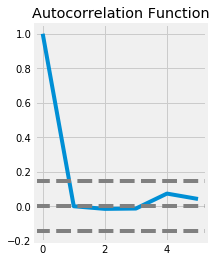

In [23]:
#This is the plotting of acf.
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
            

**From above plot it can be seen that plot is interesecting the upper confidence intervel at lag=4. so value of q is 4.**

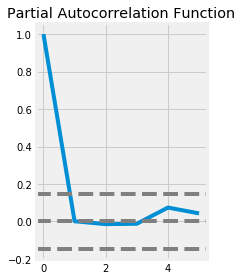

In [24]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**From above plot it can be seen that plot is interesecting the upper confidence intervel at lag=2. so value of p is 2.**

<font color="blue">**Applying train test approach to the data for seller 16**</font>

**Initially 90 % of data is taken in the training data set and remaining 10% in the testing data set.**

In [25]:
train_size = int(np.ceil(len(ts)*0.9))

In [26]:
#Below is size of training data.
train_size

165

**The data is being split into training and testing set.**

In [27]:
train, test = ts[0:train_size], ts[train_size:len(ts)]

In [28]:
ts.tail()

TransactionDate
2019-06-30    2536102
2019-07-07    3660250
2019-07-14    4015262
2019-07-21    1218675
2019-07-28    1223000
Freq: W-SUN, Name: Trans_amount, dtype: int64

In [29]:
train.tail()

TransactionDate
2019-02-24     2624311
2019-03-03     1563673
2019-03-10     1197124
2019-03-17      494219
2019-03-24    21471019
Freq: W-SUN, Name: Trans_amount, dtype: int64

In [30]:
test.head()

TransactionDate
2019-03-31    2027198
2019-04-07    5843653
2019-04-14     576325
2019-04-21    2826996
2019-04-28     731931
Freq: W-SUN, Name: Trans_amount, dtype: int64

**Now testing the stationarity of the series.**

In [31]:
dft(train)

Test_stats                    -1.270214e+01
p-value                        1.074216e-23
#Lags Used                     0.000000e+00
Number of Observations Used    1.640000e+02
Critical Value (1%)           -3.470866e+00
Critical Value (5%)           -2.879330e+00
Critical Value (10%)          -2.576255e+00
dtype: float64

**Clearly the test_stats is lesser than even 1% critical value. So the series is stationary.**

In [32]:
#Importing the requisite libraries for arima model.
from statsmodels.tsa.arima_model import ARIMA

**Training the model with calculated values of p,q and d.**

In [34]:
model = ARIMA(train, order=(2, 0,1))
model_fit = model.fit()

**Final prediction on test set of data by model.**

In [35]:
train.index

DatetimeIndex(['2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06', '2016-03-13', '2016-03-20',
               '2016-03-27', '2016-04-03',
               ...
               '2019-01-20', '2019-01-27', '2019-02-03', '2019-02-10',
               '2019-02-17', '2019-02-24', '2019-03-03', '2019-03-10',
               '2019-03-17', '2019-03-24'],
              dtype='datetime64[ns]', name='TransactionDate', length=165, freq='W-SUN')

In [36]:
test.index

DatetimeIndex(['2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28', '2019-05-05', '2019-05-12', '2019-05-19',
               '2019-05-26', '2019-06-02', '2019-06-09', '2019-06-16',
               '2019-06-23', '2019-06-30', '2019-07-07', '2019-07-14',
               '2019-07-21', '2019-07-28'],
              dtype='datetime64[ns]', name='TransactionDate', freq='W-SUN')

In [37]:
predicted= model_fit.predict(test.index[0], test.index[-1])

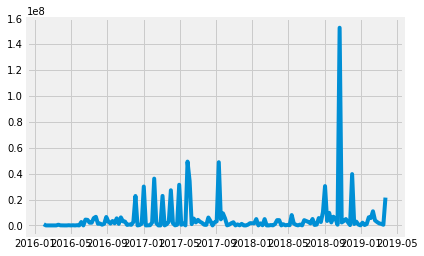

In [38]:
plt.plot(train)

In [39]:
def pred_fin(predicted, train):
    c=pd.Index(predicted.index)
    c=c.insert(0, pd.to_datetime(train.index[-1]))
    lis=list(predicted.values)
    lis.insert(0,train[-1])
    lis=pd.Series(lis,index=c)
    prediction_final=lis.apply(lambda x:int(x))
    return prediction_final

In [40]:
final_prediction=pred_fin(predicted, train)

In [41]:
train.tail()

TransactionDate
2019-02-24     2624311
2019-03-03     1563673
2019-03-10     1197124
2019-03-17      494219
2019-03-24    21471019
Freq: W-SUN, Name: Trans_amount, dtype: int64

In [42]:
final_prediction

2019-03-24    21471019
2019-03-31     4865773
2019-04-07     5551502
2019-04-14     5484806
2019-04-21     5454558
2019-04-28     5425912
2019-05-05     5400083
2019-05-12     5376741
2019-05-19     5355647
2019-05-26     5336586
2019-06-02     5319362
2019-06-09     5303798
2019-06-16     5289733
2019-06-23     5277023
2019-06-30     5265538
2019-07-07     5255160
2019-07-14     5245781
2019-07-21     5237306
2019-07-28     5229648
Freq: W-SUN, dtype: int64

**test_prediction is the data frame containing the test data and the predicted output by the model.**

<font color="blue">**Akaike information criterion(AIC)**</font>  
**Akaike information criterion is the a model evaluation measure which considers mean sum squared of residuals and the number of parameters to evaluate the quality of a model. So lower the value of aic better is the model.**

In [43]:
model_fit.aic

5916.715132187524

In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Trans_amount   No. Observations:                  165
Model:                     ARMA(2, 1)   Log Likelihood               -2953.358
Method:                       css-mle   S.D. of innovations       14362222.403
Date:                Wed, 31 Jul 2019   AIC                           5916.715
Time:                        18:47:56   BIC                           5932.245
Sample:                    01-31-2016   HQIC                          5923.019
                         - 03-24-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.158e+06   1.46e+06      3.533      0.001     2.3e+06    8.02e+06
ar.L1.Trans_amount     0.8599      0.145      5.910      0.000       0.575       1.145
ar.L2.Trans_amount     0.0395      0.079      0.497      0.620      -0.116       0.195
ma.L1.Trans_amount    -0.8665      0.123     -7.022      0.000      -1.108      -0.625
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
AR.2          -22.8614           +0.0000j           22.8614            0.5000
MA.1            1.1540           +0.0000j            1.1540            0.0000
-----------------------------------------------------------------------------
"""

*For this model aic value is 1437.*

**Below is the forecast of payment amount for seller 16 with 90 percent data in the train set. In the figure below blue line is the training data, red is the forecasted one and green one is the test set value.**

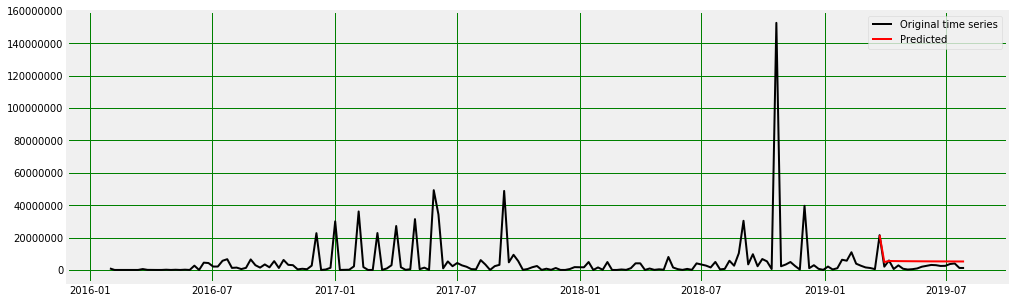

In [45]:
plt.figure(figsize=(15,5))
plt.plot(ts, color="black", linewidth=2, label="Original time series")
plt.plot(final_prediction,color="red", linewidth=2, label="Predicted")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="green")
plt.legend(loc="best")
plt.show()

**It is possible that at a different train test ratio we can have a lower value of Akaike Information Constant(aic) i.e. a better model.  
So in the below code an aic is explorated against the train test ratio.**

In [52]:
from statsmodels.tsa.arima_model import ARIMA
#An empty list to store mean squared error.
rmse=[]
#An empty list to store aic.
aic=[]
# An empty list storing fraction of total data present in training set.
ratio=[]
for x in np.arange(0.4,0.95,0.005):
    #size of training set.
    train_size = int(len(ts)*x)
    #splitting the data.    
    train, test = ts[0:train_size], ts[train_size:len(ts)]
    if dft(train)[0]<dft(train)[4]:
        model = ARIMA(train, order=(2,0,1))
        model_fit = model.fit()
        prediction_final= model_fit.predict(test.index[0], test.index[-1])
        aic.append(model_fit.aic)
        rmse.append(np.sqrt(np.mean((-test+prediction_final)**2)))
        ratio.append(x)     

**In above code the if criteria compares the test_stats and the 1% critical value. If it is satisfying the criteria then only further evaluation is done. The corresponding aic values for different models have been stored in aic list.**

<font color="blue">**we will use to criterion to compare the models.**</font>  
**1. ROOT MEAN SQUARED ERROR(rmse)**  
**2. AKAIKI INFORMATION CONSTANT(aic).**

In [53]:
aic_ratio=pd.DataFrame()
aic_ratio["aic"]=aic
aic_ratio["ratio"]=ratio

**Above dataframe contains different aic values corresponding to the fraction of total data in the training set.**

In [54]:
aic_ratio

,aic,ratio
0,3134.324485,0.490
1,3168.572679,0.495
2,3202.777081,0.500
3,3236.930313,0.505
4,3271.254750,0.510
5,3305.473392,0.515
6,3339.768084,0.520
7,3373.943966,0.525
8,3373.943966,0.530
9,3408.225384,0.535


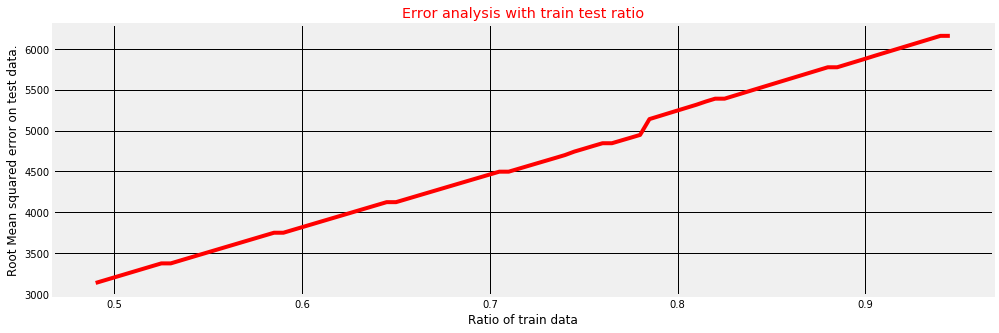

In [55]:
plt.figure(figsize=(15,5))
plt.plot(ratio,aic, color="red")
#plt.plot(ratio,rmse,color="red")
plt.xlabel("Ratio of train data")
plt.ylabel("Root Mean squared error on test data.")
plt.title("Error analysis with train test ratio", color="red")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="black")
plt.show() 

<font color="red">**In the above model the value of train size is passed in between 0.6 to 0.95. But in the plot we have only data from 0.775 to 0.950. The reason behind this is from 0.6 to 0.775 all the data have failed the stationarity test by Dicky Fuller test and hence they are automatically rejected.**</font>

**From above plot we can see that as the fraction is increasing aic value is also increasing. So at fraction = 0.815 aic is minimum.**

<font color="blue"> **NOW BELOW CODE IS PERFORMING THE BEST MODEL WITH TRAINING RATION 0.815**

In [57]:
train_size = int(np.ceil(len(ts)*0.65))

In [58]:
train_size

119

In [59]:
train, test = ts[0:train_size], ts[train_size:len(ts)]

In [60]:
dft(train)

Test_stats                      -3.776581
p-value                          0.003156
#Lags Used                       3.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64

In [61]:
from statsmodels.tsa.arima_model import ARIMA

**Below is preparing the final arima model.**

In [88]:
model = ARIMA(train, order=(4,0,3))
model_fit = model.fit()

In [89]:
train.tail()

TransactionDate
2018-04-08     20000
2018-04-15    874875
2018-04-22     60000
2018-04-29    400000
2018-05-06    145000
Freq: W-SUN, Name: Trans_amount, dtype: int64

In [90]:
test.tail()

TransactionDate
2019-06-30    2536102
2019-07-07    3660250
2019-07-14    4015262
2019-07-21    1218675
2019-07-28    1223000
Freq: W-SUN, Name: Trans_amount, dtype: int64

**Prediction is done for test set as well as for coming 6 months.**

In [91]:
predicted= model_fit.predict("2018-05-13", "2019-07-28")

In [92]:
prediction_final=pred_fin(predicted, train)

In [93]:
model_fit.aic

4145.012767411497

In [94]:
model_fit.bic

4170.024878849501

**Above is the aic value for the model. which is least of all the possible models.**

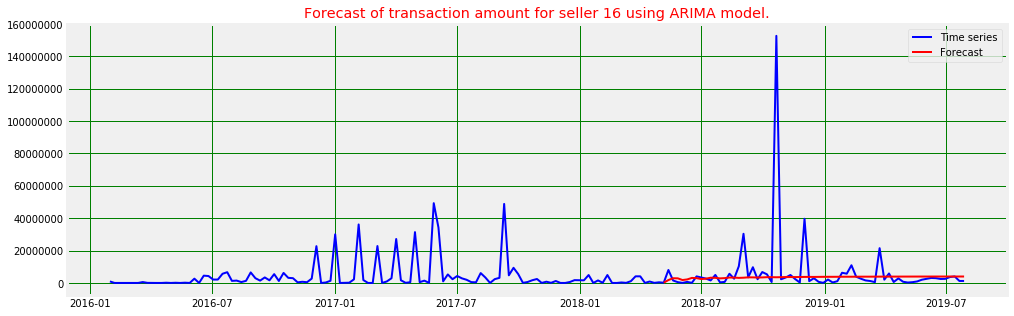

In [95]:
plt.figure(figsize=(15,5))
plt.plot(ts, color="blue", linewidth=2, label="Time series")
plt.plot(prediction_final,color="red", linewidth=2, label="Forecast")
plt.title("Forecast of transaction amount for seller 16 using ARIMA model.", color="red")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="green")
plt.legend(loc="best")
plt.show()